# Import Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, RBF, RationalQuadratic

In [2]:
import sys
sys.path.append("..")
from CovRegpy_forecasting import gp_forecast

In [3]:
plt.rcParams['figure.figsize'] = [15, 12]
sns.set(style='darkgrid')
np.random.seed(0)

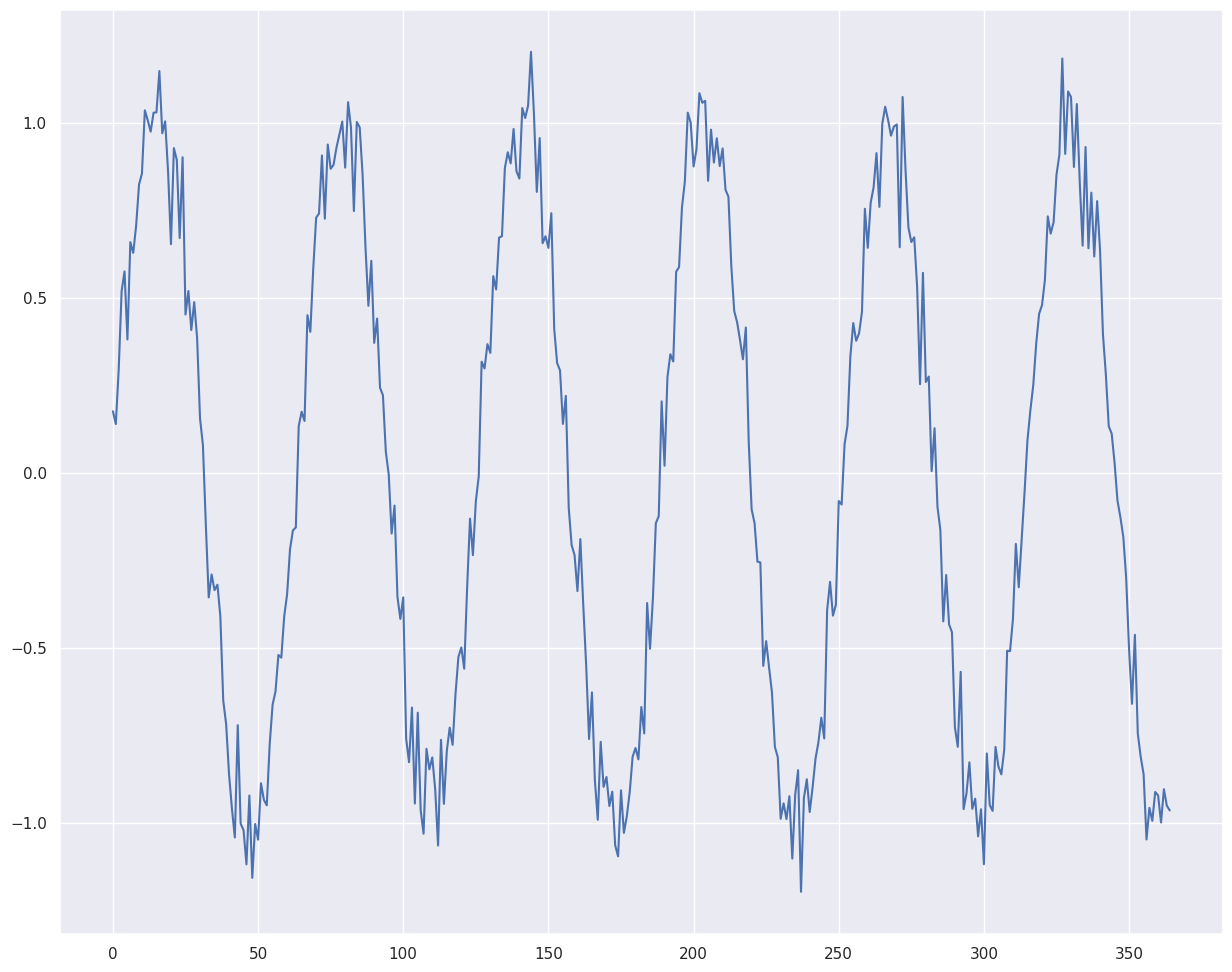

In [4]:
time_extended = np.arange(396)
time = time_extended[:365]
time_series = np.sin((1 / 10) * time)
noise = np.random.normal(0, 0.1, len(time_series))
time_series_noisy = time_series + noise
plt.plot(time, time_series_noisy)
plt.show()

# Construct Kernel

In [5]:
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-co2-py
# long term smooth rising trend
k1 = 1.0 ** 2 * RBF(length_scale=10.0,
                    length_scale_bounds=(1e-00, 1e+02))
# seasonal component
k2 = (2.4 ** 2 * RBF(length_scale=90.0,
                     length_scale_bounds=(1e-00, 1e+02)) *
      ExpSineSquared(length_scale=1.3, periodicity=1.0,
                     length_scale_bounds=(1e-01, 1e+01),
                     periodicity_bounds=(1e-02, 1e+02)))
# medium term irregularity
k3 = 0.66 ** 2 * RationalQuadratic(length_scale=1.2, alpha=0.78,
                                   length_scale_bounds=(1e-01, 1e+01),
                                   alpha_bounds=(1e-01, 1e+01))
# noise terms
k4 = 0.18 ** 2 * RBF(length_scale=0.134, length_scale_bounds=(1e-01, 1e+01)) + WhiteKernel(noise_level=0.19 ** 2)

kernel = k1 + k2 + k3 + k4

# Calculate Forecast

In [6]:
forecast_range = 100
estimate = gp_forecast(time[-forecast_range:], time_series_noisy[-forecast_range:] - np.mean(time_series_noisy[-forecast_range:]), 
                       x_forecast=time_extended, kernel=kernel, confidence_level=0.95)

/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a

# Plot Forecast Displaying Decaying Kernel

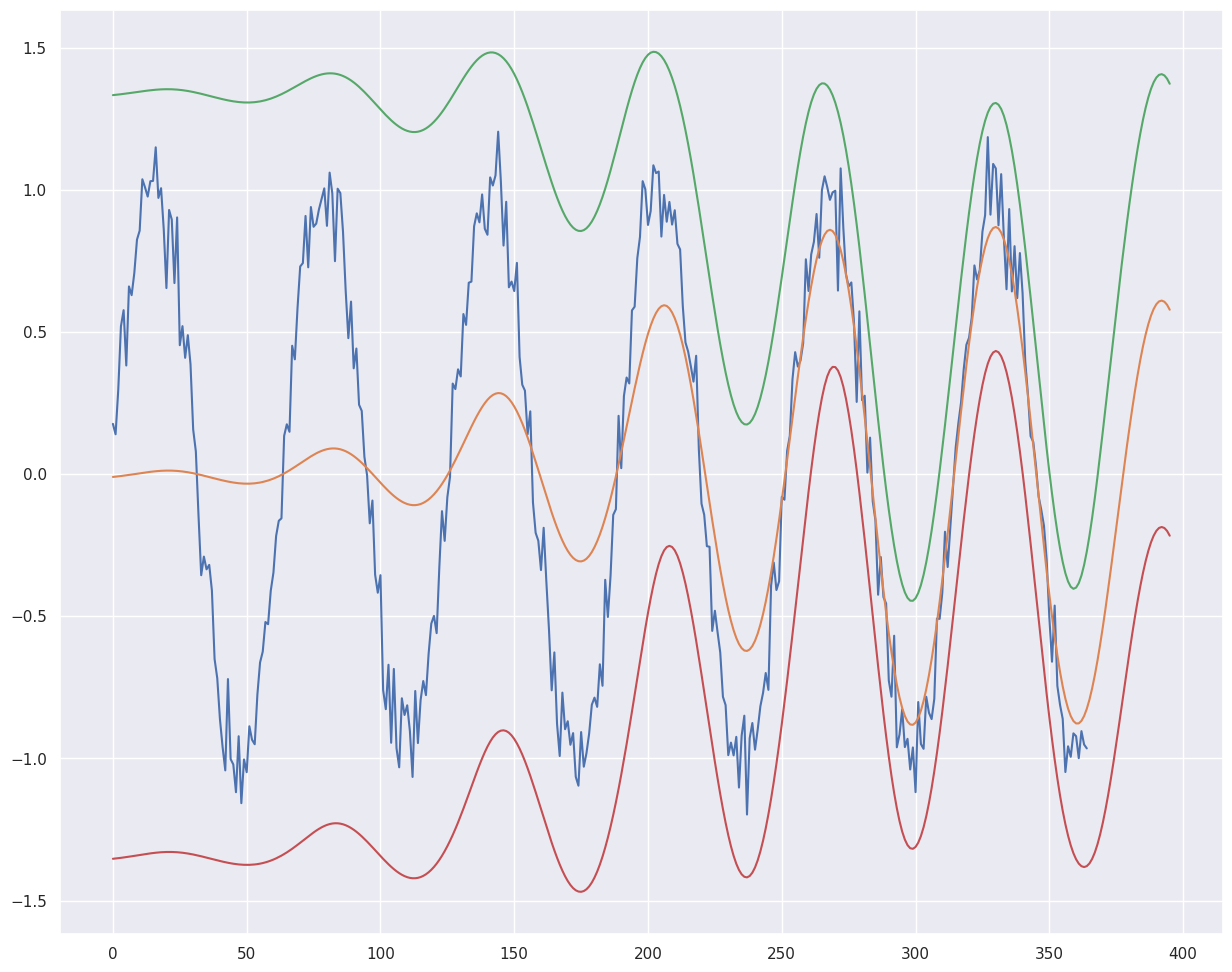

In [7]:
plt.plot(time, time_series_noisy)
plt.plot(time_extended, estimate[0] + np.mean(time_series_noisy[-forecast_range:]))
plt.plot(time_extended, estimate[2] + np.mean(time_series_noisy[-forecast_range:]))
plt.plot(time_extended, estimate[3] + np.mean(time_series_noisy[-forecast_range:]))
plt.show()